# 1. Business Understanding

A retailer needs a very high turnover and just-in-time delivery of products to be successful. For this, very precise forecasts are needed, which allow exact statements about which stores in which departments make how much turnover per week. The question is therefore as follows: What is the weekly sales forecast for all stores of a fictitious store if we take into account the data of the last three years, demographic information (CPI, Unemployment, Temperature, etc.)? Deriving from this, what then is the sales per week per department within one of these stores?

# 2. Data and Data understanding

The data used for the notebook is divided into three files. They contain different features and the common attribute stores. 

## 2.1. Import of Relevant Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn  
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set()

## 2.2. Read Train Data

In [2]:
walmart_features_data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Sales_Forecast_for_retail_store_features.csv') 
walmart_train_data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Sales_Forecast_for_retail_store_train.csv')
walmart_stores_data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Sales_Forecast_for_retail_store_stores.csv')

In [3]:
walmart_train_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
walmart_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
walmart_train_data.describe(include='all')

,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570
unique,NaN,NaN,143,NaN,2
top,NaN,NaN,2011-12-23,NaN,False
freq,NaN,NaN,3027,NaN,391909
mean,22.200546,44.260317,NaN,15981.258123,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN
50%,22.000000,37.000000,NaN,7612.030000,NaN
75%,33.000000,74.000000,NaN,20205.852500,NaN


In [6]:
walmart_train_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [7]:
walmart_train_data[walmart_train_data.duplicated(keep=False)] # existieren duplizierte Reihen ?

,Store,Dept,Date,Weekly_Sales,IsHoliday


In [8]:
walmart_train_data.isnull().sum() # existieren Nullwerte ? --> keine vorhanden

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

## 2.2.1. Descriptive Analysis

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

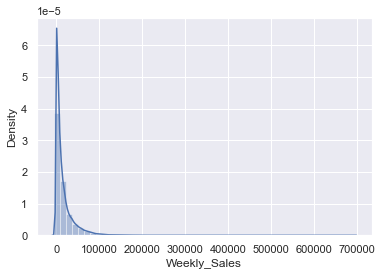

In [9]:
sns.distplot(walmart_train_data['Weekly_Sales'])

<AxesSubplot:>

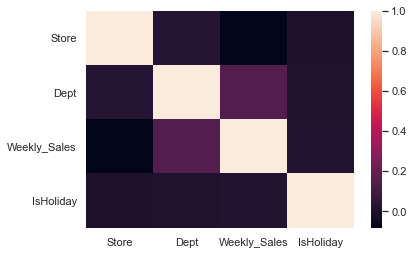

In [10]:
sns.heatmap(walmart_train_data.corr())  # Betrachtung der Korrelation über eine heatmap

# 2.3. Read Features Data

In [11]:
walmart_features_data.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
walmart_features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
walmart_features_data.describe(include='all')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,2011-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7605
mean,23.000000,NaN,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,NaN
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,NaN
min,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,NaN
25%,12.000000,NaN,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,NaN
50%,23.000000,NaN,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,NaN
75%,34.000000,NaN,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,NaN


In [14]:
walmart_features_data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [15]:
walmart_features_data.isnull().sum() # existieren Nullwerte ?

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [16]:
null = pd.DataFrame(walmart_features_data.dtypes).T.rename(index={0:'column Type'}) 
null = null.append(pd.DataFrame(walmart_features_data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
null = null.append(pd.DataFrame(walmart_features_data.isnull().sum()/walmart_features_data.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'}))
null

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
column Type,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
null values (nb),0,0,0,0,4158,5269,4577,4726,4140,585,585,0
null values (%),0,0,0,0,50.7692,64.3346,55.8852,57.7045,50.5495,7.14286,7.14286,0


In [17]:
from statistics import mean
walmart_features_data['CPI'] = walmart_features_data['CPI'].fillna(mean(walmart_features_data['CPI']))
walmart_features_data['Unemployment'] = walmart_features_data['Unemployment'].fillna(mean(walmart_features_data['Unemployment']))
walmart_features_data['MarkDown1'] = walmart_features_data['MarkDown1'].fillna(0)
walmart_features_data['MarkDown2'] = walmart_features_data['MarkDown2'].fillna(0)
walmart_features_data['MarkDown3'] = walmart_features_data['MarkDown3'].fillna(0)
walmart_features_data['MarkDown4'] = walmart_features_data['MarkDown4'].fillna(0)
walmart_features_data['MarkDown5'] = walmart_features_data['MarkDown5'].fillna(0)

## 2.3.2. Descriptive Analysis

<AxesSubplot:>

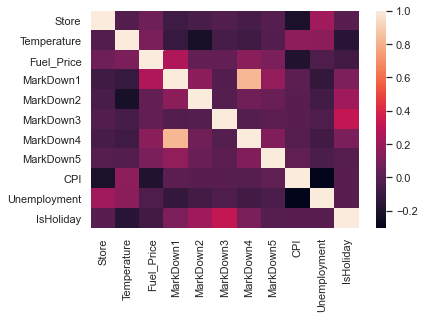

In [18]:
sns.heatmap(walmart_features_data.corr())  # Betrachtung der Korrelation über eine heatmap

## 2.4. Read stores Data

In [19]:
walmart_stores_data.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [20]:
walmart_stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [21]:
walmart_stores_data.describe(include='all')

,Store,Type,Size
count,45.000000,45,45.000000
unique,NaN,3,NaN
top,NaN,A,NaN
freq,NaN,22,NaN
mean,23.000000,NaN,130287.600000
std,13.133926,NaN,63825.271991
min,1.000000,NaN,34875.000000
25%,12.000000,NaN,70713.000000
50%,23.000000,NaN,126512.000000
75%,34.000000,NaN,202307.000000


## 2.4.1. Descriptive Analysis

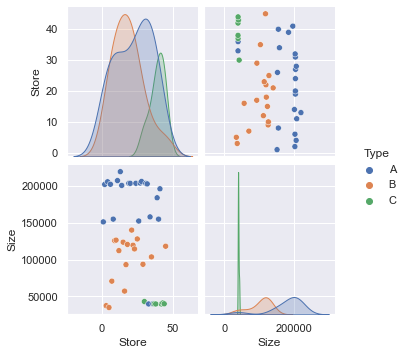

In [22]:
sns.pairplot(walmart_stores_data, vars=['Store', 'Size'], hue='Type')   # Betrachtung, ob der Typ an der Size hängt

<AxesSubplot:xlabel='Type', ylabel='Size'>

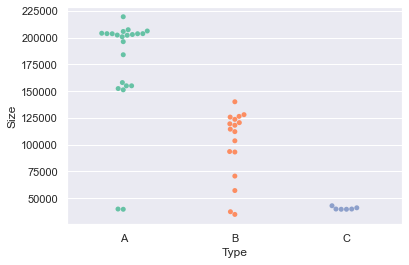

In [23]:
sns.swarmplot(x='Type',y='Size',data=walmart_stores_data,palette='Set2')

In [24]:
walmart_stores_data.loc[walmart_stores_data.Size < 50000, "Type"] = "C"
walmart_stores_data.loc[walmart_stores_data.Size >= 50000, "Type"] = "B"
walmart_stores_data.loc[walmart_stores_data.Size >= 150000, "Type"] = "A"

<AxesSubplot:xlabel='Type', ylabel='Size'>

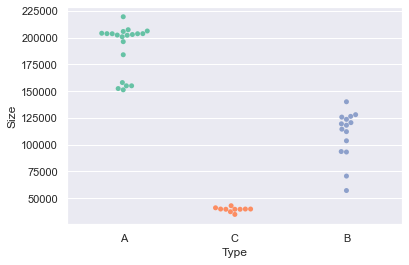

In [25]:
sns.swarmplot(x='Type',y='Size',data=walmart_stores_data,palette='Set2')

<AxesSubplot:xlabel='Type', ylabel='count'>

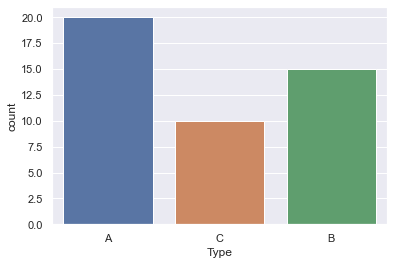

In [26]:
sns.countplot(x='Type',data=walmart_stores_data)   # Betrachtung, wieviele Läden wir von welchem Type haben

In [27]:
sizes=walmart_stores_data.count()['Size'].round(1)
print(sizes)

45


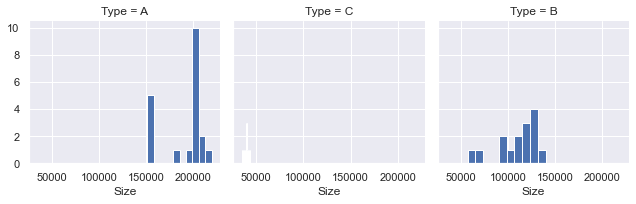

In [28]:
g = sns.FacetGrid(data=walmart_stores_data,col='Type')   # Betrachtung, wie sich inerhalb eines Types dann noch die Größe verteilt
g.map(plt.hist,'Size')

In [29]:
walmart_stores_data.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [30]:
walmart_stores_data.isnull().sum() # existieren Nullwerte ?

Store    0
Type     0
Size     0
dtype: int64

# 3. Data Preparation

In [31]:
festo_data = walmart_features_data.merge(walmart_stores_data, how='inner', on='Store')
comb_data = walmart_train_data.merge(festo_data, how='inner', on=['Store','Date','IsHoliday']).sort_values(by=['Store',
                                                                            'Dept', 'Date']).reset_index(drop=True)

In [32]:
comb_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [33]:
comb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [ ]:
sns.pairplot(comb_data, vars=['Weekly_Sales', 'Dept', 'Store', 'Size', 'CPI', 'Unemployment', 'Fuel_Price', 'Temperature'], hue='Type')

KeyboardInterrupt: 

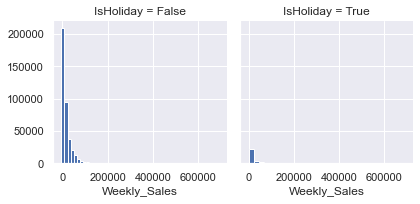

In [33]:
holiday = sns.FacetGrid(comb_data, col='IsHoliday')
holiday.map(plt.hist, 'Weekly_Sales', bins=30)

In [34]:
comb_data = comb_data.applymap(lambda x: 1 if x == True else x)
comb_data = comb_data.applymap(lambda x: 0 if x == False else x)

In [35]:
#comb_data["Date"] = pd.to_datetime(comb_data["Date"])
comb_data.Date = pd.to_datetime(comb_data.Date)

In [36]:
clean_data = comb_data[comb_data['Weekly_Sales']>0]

In [37]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  int64         
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     420212 non-null  float64       
 8   MarkDown2     420212 non-null  float64       
 9   MarkDown3     420212 non-null  float64       
 10  MarkDown4     420212 non-null  float64       
 11  MarkDown5     420212 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  object        
 15  Size          420

In [38]:
clean_data1 = clean_data[clean_data["Type"] == "A"] 

In [39]:
clean_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202286 entries, 0 to 391059
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         202286 non-null  int64         
 1   Dept          202286 non-null  int64         
 2   Date          202286 non-null  datetime64[ns]
 3   Weekly_Sales  202286 non-null  float64       
 4   IsHoliday     202286 non-null  int64         
 5   Temperature   202286 non-null  float64       
 6   Fuel_Price    202286 non-null  float64       
 7   MarkDown1     202286 non-null  float64       
 8   MarkDown2     202286 non-null  float64       
 9   MarkDown3     202286 non-null  float64       
 10  MarkDown4     202286 non-null  float64       
 11  MarkDown5     202286 non-null  float64       
 12  CPI           202286 non-null  float64       
 13  Unemployment  202286 non-null  float64       
 14  Type          202286 non-null  object        
 15  Size          202

In [40]:
clean_data1.describe(include='all')

<ipython-input-40-fbf7f56c5ae5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_data1.describe(include='all')


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,202286.000000,202286.000000,202286,202286.000000,202286.000000,202286.000000,202286.000000,202286.000000,202286.000000,202286.000000,202286.000000,202286.000000,202286.000000,202286.000000,202286,202286.000000
unique,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,2011-11-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN
freq,NaN,NaN,1451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202286,NaN
first,NaN,NaN,2010-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2012-10-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,20.934326,44.485570,NaN,20962.814036,0.070549,59.682803,3.340252,3290.207260,1146.760225,584.821624,1409.380958,2247.480669,174.610036,7.766532,NaN,191149.743017
std,12.754509,30.036683,NaN,26898.626654,0.256070,17.991029,0.456896,6827.151864,6000.218287,6194.194569,4537.213118,5338.825440,39.249815,1.744491,NaN,21961.735467
min,1.000000,1.000000,NaN,0.010000,0.000000,5.540000,2.514000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,NaN,151315.000000
25%,8.000000,20.000000,NaN,3756.900000,0.000000,46.420000,2.906000,0.000000,0.000000,0.000000,0.000000,0.000000,132.751667,6.901000,NaN,184109.000000


In [41]:
clean_data1['Week'] = clean_data1.Date.dt.week
clean_data1['Year'] = clean_data1.Date.dt.year

<ipython-input-41-84301be4958e>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  clean_data1['Week'] = clean_data1.Date.dt.week
<ipython-input-41-84301be4958e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data1['Week'] = clean_data1.Date.dt.week
<ipython-input-41-84301be4958e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data1['Year'] = clean_data1.Date.dt.year


C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


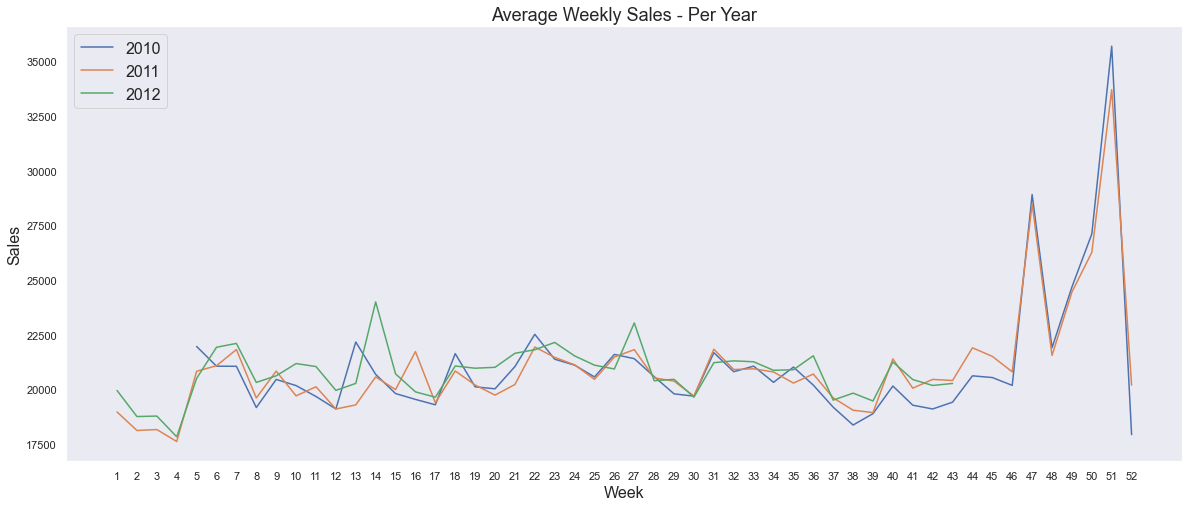

In [42]:
weekly_sales_2010 = clean_data1[clean_data1.Year==2010]['Weekly_Sales'].groupby(clean_data1['Week']).mean()
weekly_sales_2011 = clean_data1[clean_data1.Year==2011]['Weekly_Sales'].groupby(clean_data1['Week']).mean()
weekly_sales_2012 = clean_data1[clean_data1.Year==2012]['Weekly_Sales'].groupby(clean_data1['Week']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

In [43]:
clean_data1[['Dept', 'Weekly_Sales']].groupby(['Dept'], as_index=False).mean().sort_values(by='Weekly_Sales', ascending=False)

,Dept,Weekly_Sales
73,92,119434.208462
76,95,103465.496752
71,90,74586.846629
36,38,69920.036122
60,72,62415.554941
...,...,...
49,51,23.226359
43,45,22.558960
63,78,10.762018
37,39,9.998667


C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


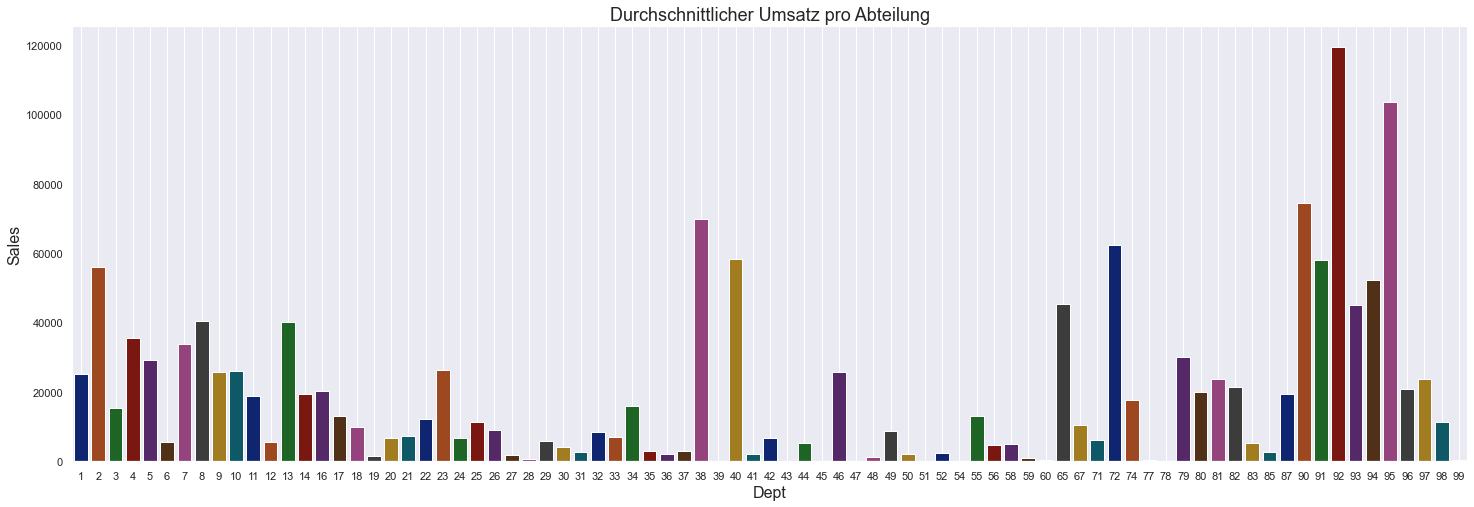

In [44]:
weekly_sales = clean_data1['Weekly_Sales'].groupby(clean_data1['Dept']).mean()
plt.figure(figsize=(25,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Durchschnittlicher Umsatz pro Abteilung', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.show()

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

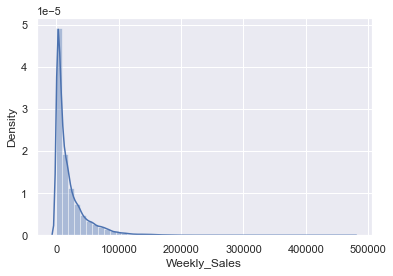

In [45]:
sns.distplot(clean_data1['Weekly_Sales'])  

In [46]:
clean_data2 = clean_data1[clean_data1["Dept"] == 92] 

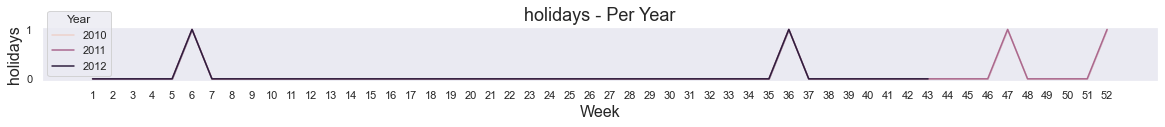

In [47]:
plt.figure(figsize=(20,1))
sns.lineplot(x="Week", y="IsHoliday", hue="Year", data=clean_data2)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.title('holidays - Per Year', fontsize=18)
plt.ylabel('holidays', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

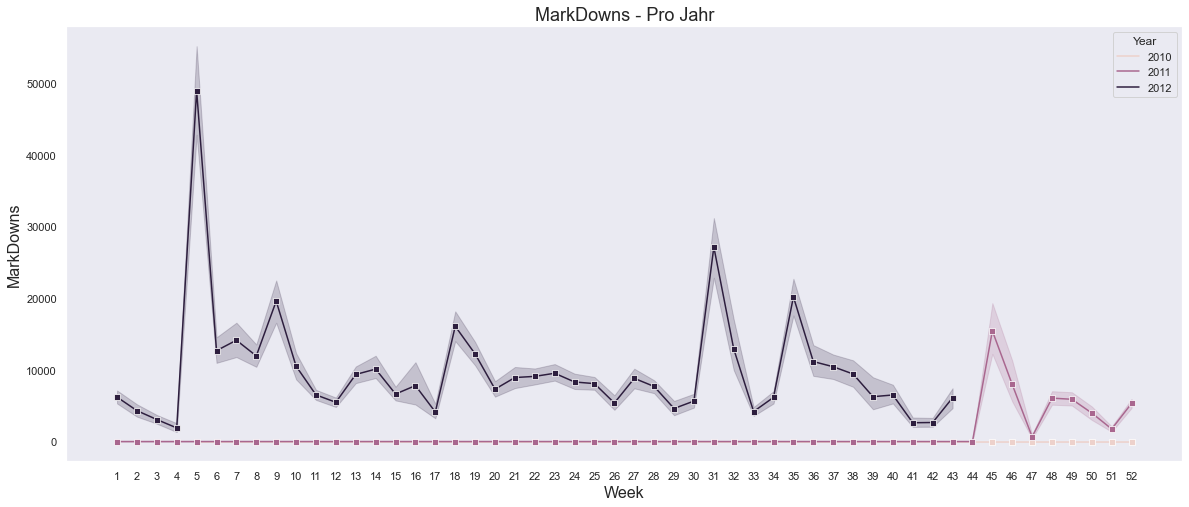

In [48]:
plt.figure(figsize=(20,8))
sns.lineplot(x="Week", y="MarkDown1", hue="Year", data=clean_data2, marker="s") 
#sns.lineplot(x="Week", y="MarkDown2", hue="Year", data=clean_data2, marker=">") #, palette="tab10")
#sns.lineplot(x="Week", y="MarkDown3", hue="Year", data=clean_data2, marker="+", palette="tab10")
#sns.lineplot(x="Week", y="MarkDown4", hue="Year", data=clean_data2, marker="o")
#sns.lineplot(x="Week", y="MarkDown5", hue="Year", data=clean_data2, marker="x", palette="Spectral")
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.title('MarkDowns - Pro Jahr', fontsize=18)
plt.ylabel('MarkDowns', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

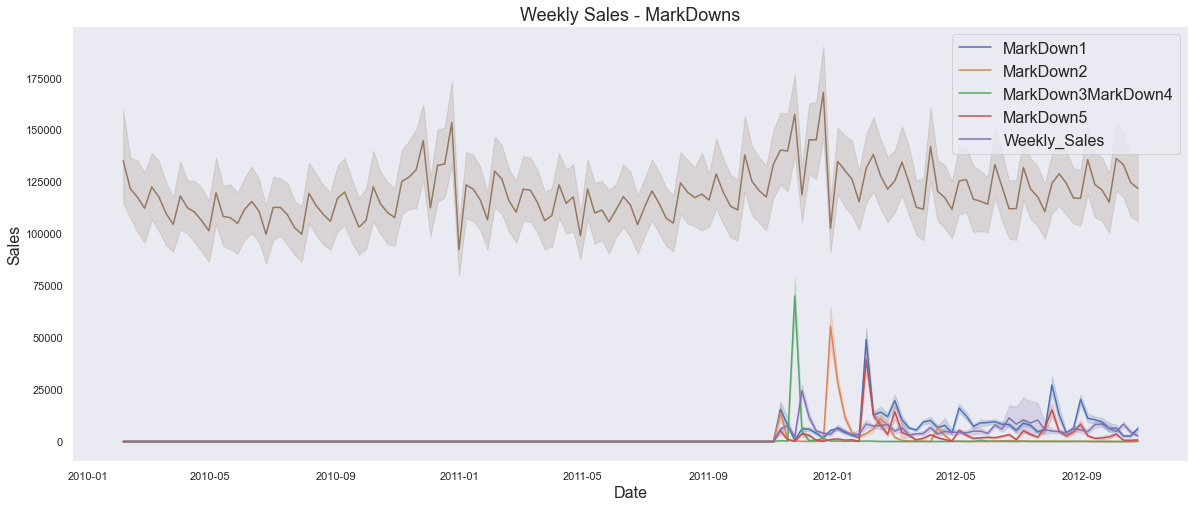

In [49]:
plt.figure(figsize=(20,8))
sns.lineplot(x="Date", y="MarkDown1", data=clean_data2)
sns.lineplot(x="Date", y="MarkDown2", data=clean_data2)
sns.lineplot(x="Date", y="MarkDown3", data=clean_data2)
sns.lineplot(x="Date", y="MarkDown4", data=clean_data2)
sns.lineplot(x="Date", y="MarkDown5", data=clean_data2)

sns.lineplot(x="Date", y="Weekly_Sales", data=clean_data2)
plt.grid()
plt.legend(['MarkDown1', 'MarkDown2', 'MarkDown3' 'MarkDown4', 'MarkDown5', 'Weekly_Sales'], loc='best', fontsize=16)
plt.title('Weekly Sales - MarkDowns', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

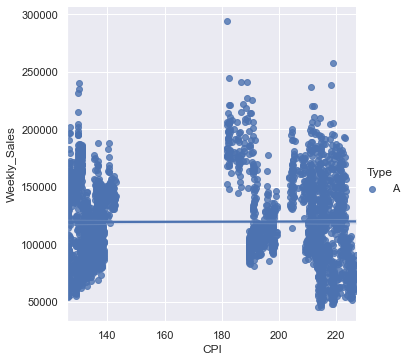

In [50]:
sns.lmplot(x='CPI',y='Weekly_Sales',data=clean_data2,hue='Type')

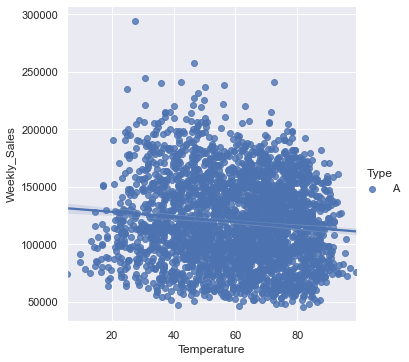

In [51]:
sns.lmplot(x='Temperature',y='Weekly_Sales',data=clean_data2,hue='Type')

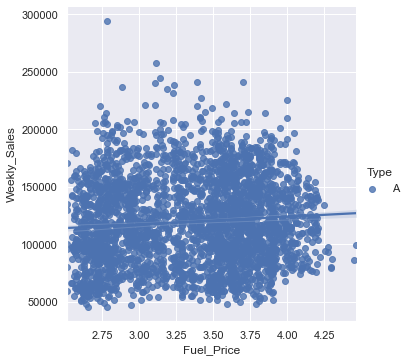

In [52]:
sns.lmplot(x='Fuel_Price',y='Weekly_Sales',data=clean_data2,hue='Type')

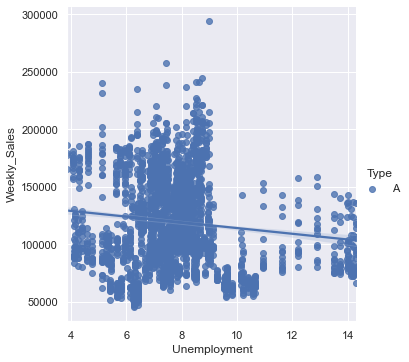

In [53]:
sns.lmplot(x='Unemployment',y='Weekly_Sales',data=clean_data2,hue='Type')

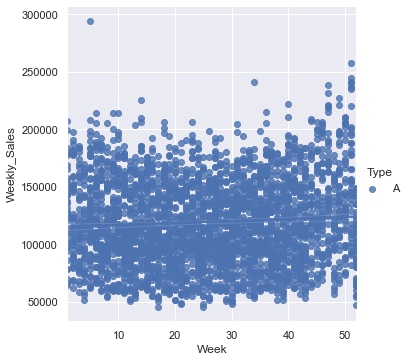

In [54]:
sns.lmplot(x='Week',y='Weekly_Sales',data=clean_data2,hue='Type')

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

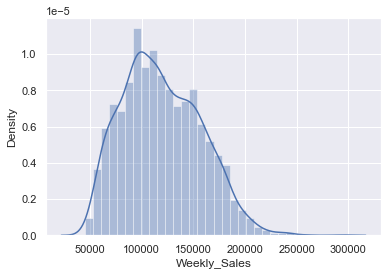

In [55]:
sns.distplot(clean_data2['Weekly_Sales'])

## 3.1. Test for Correlation

<AxesSubplot:>

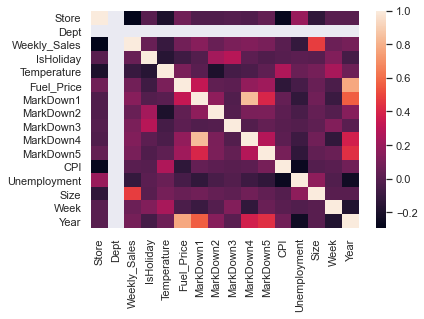

In [56]:
sns.heatmap(clean_data2.corr())

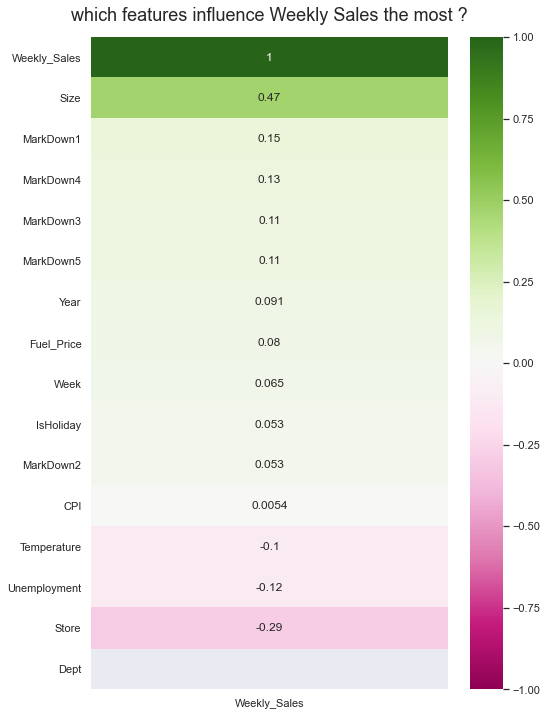

In [57]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(clean_data2.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('which features influence Weekly Sales the most ?', fontdict={'fontsize':18}, pad=16);

In [58]:
clean_data2.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
Year            0
dtype: int64

In [59]:
clean_data3 = clean_data2.drop(['CPI', 'Fuel_Price', 'Dept'], axis = 1) 

In [60]:
clean_data3.isnull().sum() 

Store           0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
Unemployment    0
Type            0
Size            0
Week            0
Year            0
dtype: int64

<AxesSubplot:>

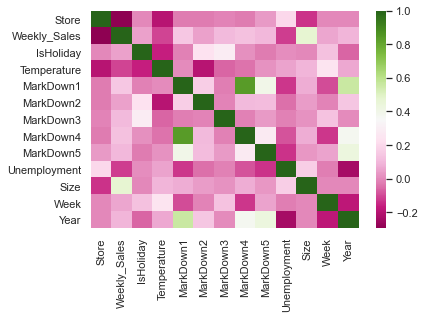

In [61]:
sns.heatmap(clean_data3.corr(),cmap="PiYG")

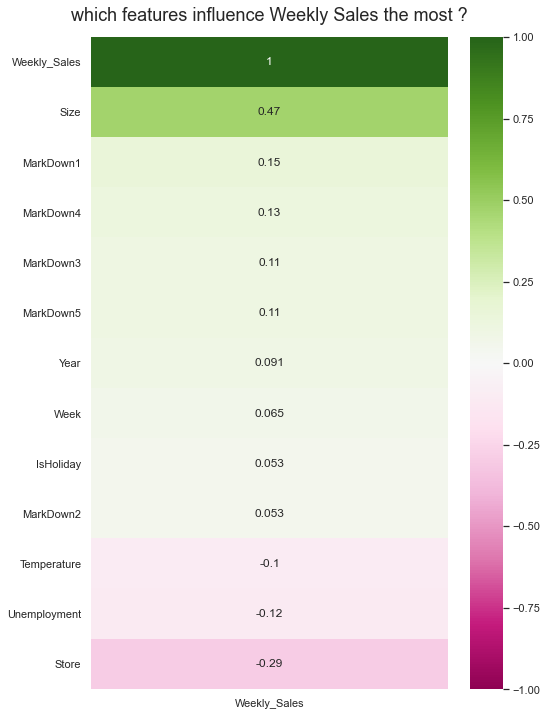

In [62]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(clean_data3.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('which features influence Weekly Sales the most ?', fontdict={'fontsize':18}, pad=16);

## 3.2. Resetting Index

- Deleting observations preserves the original indices
- Deleting observations with indices 2 and 3 will result in an index like: 0,1,4,5,6
- Once we reset the index, a new column is created that contains the old index
- Use 'drop=True' to delete the old index completely

In [63]:
clean_data4 = clean_data3.reset_index(drop=True)  
clean_data4.describe(include='all')

<ipython-input-63-a745ee53004c>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_data4.describe(include='all')


,Store,Date,Weekly_Sales,IsHoliday,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Type,Size,Week,Year
count,2860.000000,2860,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860,2860.000000,2860.000000,2860.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
top,NaN,2011-07-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN
freq,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2860,NaN,NaN,NaN
first,NaN,2010-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-10-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,21.000000,NaN,119434.208462,0.069930,59.737063,3274.485661,1136.812409,570.622937,1396.637923,2246.015262,7.765653,NaN,190992.500000,25.818182,2010.965035
std,12.761542,NaN,37562.653935,0.255074,18.000214,6803.391970,5966.226600,6110.689225,4506.434693,5378.014318,1.745066,NaN,21992.587981,14.130574,0.797097
min,1.000000,NaN,45263.340000,0.000000,5.540000,0.000000,-265.760000,-29.100000,0.000000,0.000000,3.879000,NaN,151315.000000,1.000000,2010.000000
25%,10.250000,NaN,91257.565000,0.000000,46.507500,0.000000,0.000000,0.000000,0.000000,0.000000,6.901000,NaN,177610.250000,14.000000,2010.000000


## 3.3. Test for Multicollinearity


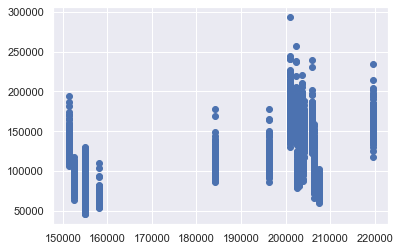

In [64]:
plt.scatter(clean_data4['Size'], clean_data3['Weekly_Sales'])  # eine lineare Funktion sollte entstehen - nicht exponentielle Funktion

Violation of OLS Assumption --> no Linearity Solution then perform a Log Transformation

In [65]:
log_sales = np.log(clean_data4['Weekly_Sales'])
clean_data4['log_sales'] = log_sales
clean_data4

,Store,Date,Weekly_Sales,IsHoliday,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Type,Size,Week,Year,log_sales
0,1,2010-02-05,139884.94,0,42.31,0.00,0.00,0.00,0.00,0.00,8.106,A,151315,5,2010,11.848576
1,1,2010-02-12,143081.42,1,38.51,0.00,0.00,0.00,0.00,0.00,8.106,A,151315,6,2010,11.871169
2,1,2010-02-19,135066.75,0,39.93,0.00,0.00,0.00,0.00,0.00,8.106,A,151315,7,2010,11.813524
3,1,2010-02-26,125048.08,0,46.63,0.00,0.00,0.00,0.00,0.00,8.106,A,151315,8,2010,11.736454
4,1,2010-03-05,132945.44,0,46.50,0.00,0.00,0.00,0.00,0.00,8.106,A,151315,9,2010,11.797694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,41,2012-09-28,128422.98,0,56.08,4578.46,51.73,3.00,1902.88,14423.97,6.432,A,196321,39,2012,11.763085
2856,41,2012-10-05,142134.06,0,50.14,6094.23,0.00,33.94,2887.65,3853.33,6.195,A,196321,40,2012,11.864526
2857,41,2012-10-12,145984.90,0,39.38,1570.23,0.00,26.31,834.80,14421.12,6.195,A,196321,41,2012,11.891258
2858,41,2012-10-19,132903.53,0,49.56,3138.86,0.00,6.17,129.04,8206.10,6.195,A,196321,42,2012,11.797379


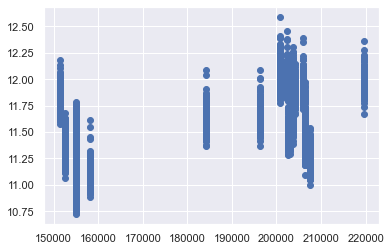

In [66]:
plt.scatter(clean_data4['Size'], clean_data4['log_sales'])

In [67]:
clean_data4 = clean_data4.drop(['Weekly_Sales'], axis=1)

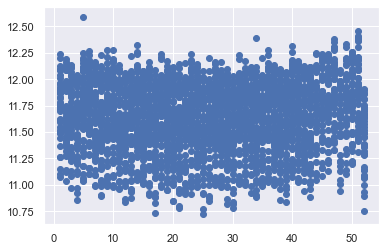

In [68]:
plt.scatter(clean_data4['Week'], clean_data4['log_sales'])

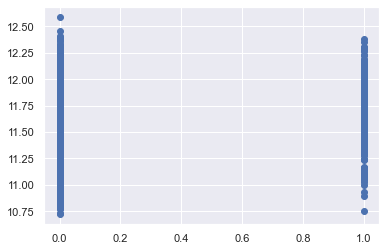

In [69]:
plt.scatter(clean_data4['IsHoliday'], clean_data4['log_sales'])

Assumption no Multicollinearity

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = clean_data4[['Week', 'Year', 'Size']]   

vif = pd.DataFrame() 

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,4.338373,Week
1,79.762781,Year
2,76.444362,Size


In [71]:
data_no_multi = clean_data4.drop(['Year'], axis=1)

## 3.4. Creating Dummy Variables

In [72]:
data_with_dummies = pd.get_dummies(data_no_multi, drop_first=True)   # drop_first=true: die erste Ausprägung aller categorialen Werte wird weggelassen

In [73]:
data_with_dummies.head()

,Store,Date,IsHoliday,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Size,Week,log_sales
0,1,2010-02-05,0,42.31,0.0,0.0,0.0,0.0,0.0,8.106,151315,5,11.848576
1,1,2010-02-12,1,38.51,0.0,0.0,0.0,0.0,0.0,8.106,151315,6,11.871169
2,1,2010-02-19,0,39.93,0.0,0.0,0.0,0.0,0.0,8.106,151315,7,11.813524
3,1,2010-02-26,0,46.63,0.0,0.0,0.0,0.0,0.0,8.106,151315,8,11.736454
4,1,2010-03-05,0,46.50,0.0,0.0,0.0,0.0,0.0,8.106,151315,9,11.797694


In [74]:
data_with_dummies.columns.values

array(['Store', 'Date', 'IsHoliday', 'Temperature', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Unemployment',
       'Size', 'Week', 'log_sales'], dtype=object)

In [76]:
cols=['log_sales', 'Store', 'Date', 'IsHoliday', 'Size', 'Week', 'Temperature', 'Unemployment', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5']
#cols=['log_sales', 'Store', 'Date', 'IsHoliday', 'Size', 'Week', 'Temperature', 'Unemployment'] # because the R² improves if we keep these values in

In [77]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_sales,Store,Date,IsHoliday,Size,Week,Temperature,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,11.848576,1,2010-02-05,0,151315,5,42.31,8.106,0.0,0.0,0.0,0.0,0.0
1,11.871169,1,2010-02-12,1,151315,6,38.51,8.106,0.0,0.0,0.0,0.0,0.0
2,11.813524,1,2010-02-19,0,151315,7,39.93,8.106,0.0,0.0,0.0,0.0,0.0
3,11.736454,1,2010-02-26,0,151315,8,46.63,8.106,0.0,0.0,0.0,0.0,0.0
4,11.797694,1,2010-03-05,0,151315,9,46.50,8.106,0.0,0.0,0.0,0.0,0.0


## Local file
df_dummies.to_csv('train_dummies.csv', index = False) # full path if file should not be in the same folder as the notebook

## Cloud file
#project.save_data("train_dummies.csv", df_dummies.to_csv(index=False))

# 4. Modelling and Evaluation

## 4.1. Multiple Linear Regression Model

In [78]:
targets = data_preprocessed['log_sales']   # zielvariable
inputs = data_preprocessed.drop(['log_sales', 'Date'], axis=1)

## 4.2. Feature Scaling

transforms our data into standard distributed data

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
input_scaled = scaler.transform(inputs)

## 4.3. Test and Train Data

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=365)

In [81]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [82]:
y_hat = reg.predict(x_train)

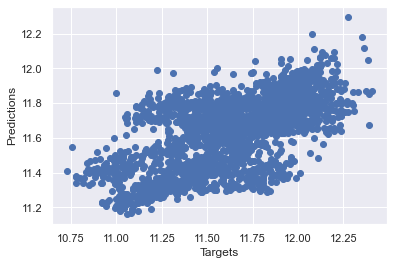

In [83]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.show()

C:\Users\eebal\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals')

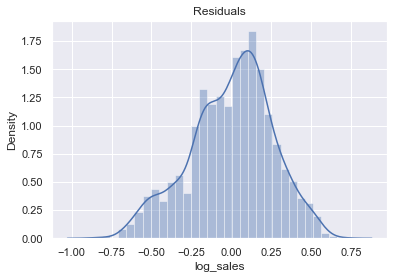

In [84]:
sns.distplot(y_train - y_hat)
plt.title("Residuals")

In [85]:
reg.score(x_train, y_train)

0.35803414778302856

The coefficient of determination R² is only about 35.8%. Presumably, another model has to be found, since these data are not useful for this purpose. Probably it is also because we have only taken the stores of type A and only the department 92 into consideration and thus a good forecast is not possible at all for everything.

In [87]:
reg.intercept_   

11.638698055432007

In [88]:
reg.coef_  

array([-0.05460284, -0.00297525,  0.1697551 ,  0.03078332, -0.06801271,
       -0.04136023,  0.02414852, -0.01160719,  0.01454898,  0.00087434,
        0.01764553])

In [89]:
reg_summary = pd.DataFrame(inputs.columns, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Store,-0.054603
1,IsHoliday,-0.002975
2,Size,0.169755
3,Week,0.030783
4,Temperature,-0.068013
5,Unemployment,-0.041360
6,MarkDown1,0.024149
7,MarkDown2,-0.011607
8,MarkDown3,0.014549
9,MarkDown4,0.000874


Size has the biggest effect on sales followed by the week, as expected. If we change the size by 1, then the turnover changes by 0.169.

In [90]:
y_hat_test = reg.predict(x_test)

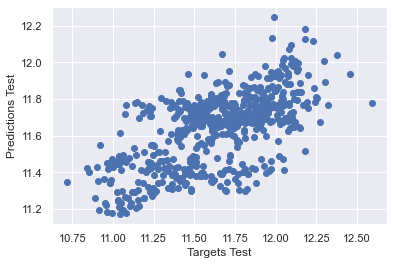

In [91]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets Test')
plt.ylabel('Predictions Test')
plt.show()

In [92]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head() 

,Predictions
0,116819.417145
1,130998.419879
2,92313.264681
3,90837.833968
4,117826.572101


In [93]:
df_pf['Target'] = np.exp(y_test) 
df_pf.head()

,Predictions,Target
0,116819.417145,NaN
1,130998.419879,143081.42
2,92313.264681,NaN
3,90837.833968,NaN
4,117826.572101,NaN


In [94]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    11.703337
1    12.038666
2    11.550857
3    11.463528
4    11.968262
Name: log_sales, dtype: float64

In [95]:
df_pf['Target'] = np.exp(y_test) 
df_pf.head()

,Predictions,Target
0,116819.417145,120974.69
1,130998.419879,169171.18
2,92313.264681,103866.03
3,90837.833968,95180.23
4,117826.572101,157670.36


In [96]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Predictions']
df_pf

,Predictions,Target,Residuals
0,116819.417145,120974.69,4155.272855
1,130998.419879,169171.18,38172.760121
2,92313.264681,103866.03,11552.765319
3,90837.833968,95180.23,4342.396032
4,117826.572101,157670.36,39843.787899
...,...,...,...
567,109907.197654,116989.93,7082.732346
568,111919.500560,80209.05,-31710.450560
569,85980.050529,126907.41,40927.359471
570,140304.667673,155777.29,15472.622327


In [97]:
df_pf['Difference%'] = np.absolute(df_pf['Residuals'] / df_pf['Target']*100)
df_pf   

,Predictions,Target,Residuals,Difference%
0,116819.417145,120974.69,4155.272855,3.434828
1,130998.419879,169171.18,38172.760121,22.564576
2,92313.264681,103866.03,11552.765319,11.122756
3,90837.833968,95180.23,4342.396032,4.562288
4,117826.572101,157670.36,39843.787899,25.270309
...,...,...,...,...
567,109907.197654,116989.93,7082.732346,6.054138
568,111919.500560,80209.05,-31710.450560,39.534754
569,85980.050529,126907.41,40927.359471,32.249779
570,140304.667673,155777.29,15472.622327,9.932528


In [98]:
df_pf.describe()

,Predictions,Target,Residuals,Difference%
count,572.000000,572.000000,572.000000,572.000000
mean,115670.583849,120025.710717,4355.126868,21.517588
std,22941.875293,39330.902460,31032.826964,17.482142
min,71040.429117,45263.340000,-63813.487107,0.127541
25%,94828.761143,90459.230000,-17799.809897,8.428694
50%,118220.278893,116320.655000,1400.734279,18.218184
75%,129494.110343,148368.807500,24456.722143,28.399692
max,208616.696105,293966.050000,163920.222512,98.055631
